# Машинное обучение, ФКН ВШЭ #

## Практическое задание 5. Решающие деревья ##

### Общая информация ###

Дата выдачи: 25.11.2025

Мягкий дедлайн: 07.12.2025 23:59

Жесткий дедлайн: 11.12.2025 23:59

### О задании

В процессе выполнения этого домашнего задания вы:

1. Попрактикуетесь использовать решающие деревья из `sklearn` для задачи классификации на простых двумерных датасетах, научитесь визуализировать разделяющие плоскости и распознавать переобучение.

2. Реализуете своё решающее дерево для задачи классификации и сравните его со стандартной имплементацией.

3. Исследуете влияние бэггинга на смещение и разброс.

### Оценивание и штрафы

Каждая из задач имеет определенную стоимость, которая указана в скобках около номера задачи. Максимально допустимая оценка за работу $-$ 10 баллов.

Задание выполняется самостоятельно. "Похожие" решения считаются плагиатом: все задействованные студенты (в том числе те, у кого списали) получают не более 0 баллов. Если вы использовали внешний источник (даже частично), укажите ссылку в отдельном блоке в конце работы.

Неэффективная реализация кода может негативно отразиться на оценке.

**Устная проверка.** Для проверки понимания кода и выводов студент может быть приглашён на устную защиту. Оценка за задание может быть изменена после устной защиты. Если студент не может объяснить ключевые части решения и принятые решения, работа считается недобросовестной и оценивается в 0 баллов независимо от автотестов.


### Формат сдачи

Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Номера лучших посылок в Яндекс.Контесте для обеих задач

В [контест](https://new.contest.yandex.ru/contests/72204/start) нужно отправить файл hw5code.py с реализованными функциями и классами.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Решающие деревья

### Визуализация (1 балл)

Рассмотрим три простых двумерных датасета, сгенерированных с помощью `make_moons`, `make_circles` и `make_classification`.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2,
                        class_sep=0.75, random_state=3, n_redundant=0)
]

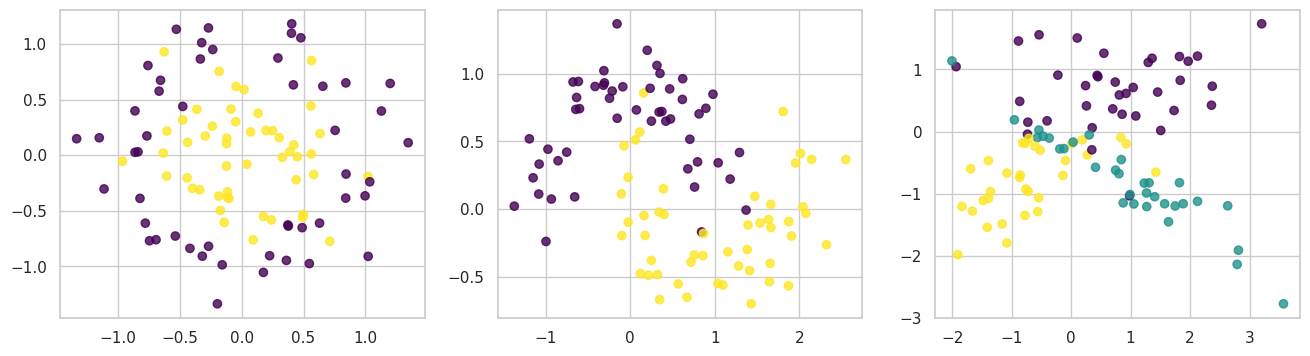

In [ ]:
plt.figure(figsize=(16, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap="viridis", alpha=0.8)

__Задание 1. (0.5 балла)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности и посчитайте accuracy на обучающей и тестовой выборках. Прокомментируйте, в каких случаях и почему модель переобучается.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

__Задание 2. (0.5 балла)__

Выберите один датасет из предыдущего задания и исследуйте на его примере влияние на итоговое качество двух гиперпараметров одновременно. Для каждой пары значений посчитайте accuracy на обучающей и тестовой выборках и сохраните результаты в таблицу.

Визуализируйте зависимость качества на тестовой выборке от значений выбранных вами гиперпараметров. При каких значениях наблюдается лучшее соотношение разброса и смещения? Почему вы сделали такой вывод?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

### Решающие деревья своими руками (6 баллов)

Итак, пришло время реализовать свой класс для обучения решающего дерева.

__Задание 3. (1.5 балла)__

Реализуйте функцию `find_best_split` из модуля `hw5code.py`, её сигнатура прописана в соответствующем файле.

Напоминаем, что под критерием Джини подразумевается следующая функция качества разбиения:

$$
Q(R) = -\frac{|R_l|}{|R|} H(R_l) - \frac{|R_r|}{|R|} H(R_r),
$$

где $R$ - множество объектов, $R_l$ и $R_r$ - объекты, попавшие в левое и правое поддерево соответственно.

Функция неоднородности (критерий Джини) для множества $R$ определяется как

$$
H(R) = 1 - \sum_{k=1}^{K} p_k^2,
$$

где $p_k$ - доля объектов класса $k$ в множестве $R$, а $K$ - число различных классов в текущем узле.

Замечание: при $K=2$ формула сводится к бинарному случаю $H(R)=1-p_0^2-p_1^2$, где $p_1$ и $p_0$ $-$ доля объектов классов $1$ и $0$ соответственно.


__Задание 4. (0.75 балл)__

Загрузите датасет [Student Performance](https://archive.ics.uci.edu/dataset/320/student+performance). Поработайте с данными: создайте бинарный признак `pass`, который будет равен единице, если итоговая оценка `G3` не меньше $10$, и нулю в противном случае. Затем выберите пять числовых признаков, среди которых должны быть как очень информативные, так и потенциально неинформативные. Коротко обоснуйте свой выбор.

Для каждого из выбранных признаков постройте график зависимости критерия Джини от возможного порога разделения. Отобразите все пять кривых на одном рисунке.

Для каждого из выбранных признаков дополнительно визуализируйте зависимость
"значение признака - класс (0/1)".

> Можно, например, построить scatter-график, где по оси X - значение признака, а по оси Y - бинарный признак `pass` (при необходимости используйте небольшой jitter по оси Y и/или прозрачность alpha, чтобы лучше видеть плотность точек); или использовать эквивалентную по смыслу визуализацию (например, `seaborn.stripplot` / `swarmplot`), из которой видно, как распределены значения признака внутри каждого класса.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

__Задание 5. (0.25 балла)__

На основании построенных в прошлом задании графиков ответьте на следующие вопросы:

1. По какому признаку нужно производить деление выборки на два поддерева? Почему?

2. Согласуется ли этот результат с тем, что видно на scatter-графиках? Совпадают ли выводы?

3. Как выглядят кривые для тех признаков, по которым классы разделяются почти идеально? Чем отличаются от них кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла)__

Разберитесь с уже написанным кодом в классе `DecisionTree` модуля `hw5code.py`. Исправьте ошибки в методе `_fit_node`, а также реализуйте `_predict_node`.

В данном задании:
* построение дерева осуществляется согласно базовому жадному алгоритму, предложенному на лекции
* выбор лучшего разбиения необходимо производить по критерию Джини
* в качестве критерия останова используется следующий: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку
* ответ в листе $-$ это наиболее часто встречающийся в нём класс
* для категориальных признаков выполняется преобразование, описанное на лекции (можете найти его в конспекте в разделе «Учёт категориальных признаков»)

__Задание 7. (0.5 балла)__

Протестируйте написанное вами решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Для этого необходимо скачать таблицу agaricus-lepiota.data и применить к каждому столбцу LabelEncoder, чтобы преобразовать строковые имена категорий в натуральные числа.

Первый столбец в рассматриваемой таблице $-$ это целевая переменная ('e' $-$ edible, 'p' $-$ poisonous).

Обучите решающее дерево на $50\%$ случайно выбранных объектов и получите предсказания для оставшейся половины. Вычислите accuracy. Если в предыдущих заданиях вы всё сделали корректно, то у вас должно получиться качество очень близкое единице или даже равное ей.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Задание 8. (1 балл)__

Реализуйте в классе `DecisionTree` поддержку параметров `max_depth`, `min_samples_split` и `min_samples_leaf` по аналогии с `DecisionTreeClassifier`.

__Задание 9. (0.5 балла)__

Сравните реализованное вами дерево со стандартной имплементацией из `sklearn` для набора данных [nursery](https://archive.ics.uci.edu/dataset/76/nursery).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Bias-variance decomposition (3 балла)

В этой части задания воспользуемся возможностями бутстрапа для оценки смещения и разброса алгоритмов машинного обучения.

В этом разделе мы будем работать с датасетом `California housing` из `sklearn.datasets.fetch_california_housing`. Это задача регрессии: по признакам района (доход, возраст домов и т.п.) нужно предсказать MedHouseVal - медианная стоимость жилья.

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = california["data"]
y = california["target"]

X.shape, y.shape

Во всех заданиях этого раздела (задания 10-11) используйте одни и те же данные `X, y` и три стандартные модели из sklearn:

* `LinearRegression`
* `DecisionTreeRegressor`
* `RandomForestRegressor`

Все три модели имеют единый интерфейс, что позволит передавать их в общие функции.


### Вычисление bias и variance (1.5 балл)

На [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/lecture-notes/lecture08-ensembles.pdf) была выведена следующая формула, показывающая, как можно представить ошибку алгоритма регрессии в виде суммы трех компонент:
$$
L(\mu) =
    \mathbb{E}_{x, y}\bigl[\mathbb{E}_{X}\bigl[ (y - \mu(X)(x))^2 \bigr]\bigr] =
$$

$$
    \underbrace{\mathbb{E}_{x, y}\bigl[(y - \mathbb{E}[y|x] )^2\bigr]}_{\text{шум}} + \underbrace{\mathbb{E}_{x}\bigl[(\mathbb{E}_{X}[\mu(X)(x)] - \mathbb{E}[y|x] )^2\bigr]}_{\text{смещение}} +
    \underbrace{\mathbb{E}_{x}\bigl[\mathbb{E}_{X}\bigl[(\mu(X)(x) - \mathbb{E}_{X}[\mu(X)(x)] )^2\bigr]\bigr]}_{\text{разброс}},
$$
* $\mu(X)$ — алгоритм, обученный по выборке $X = \{(x_1, y_1), \dots (x_\ell, y_\ell)\}$;
* $\mu(X)(x)$ — ответ алгоритма, обученного по выборке $X$, на объекте $x$;
* $\mathbb{E}_{X}$ — мат. ожидание по всем возможным выборкам;
* $\mathbb{E}_{X}[\mu(X)(x)]$ — "средний" ответ алгоритма, обученного по всем возможным выборкам $X$, на объекте $x$.
    
С помощью этой формулы мы можем анализировать свойства алгоритма обучения модели $\mu$, если зададим вероятностную модель порождения пар $p(x, y)$.

В реальных задачах мы, конечно же, не знаем распределение на парах объект - правильный ответ. Однако у нас есть набор семплов из этого распределения (обучающую выборка), и мы можем использовать его, чтобы оценивать математические ожидания. Для оценки мат. ожиданий по выборкам мы будем пользоваться бутстрэпом - методом генерации "новых" выборок из одной с помощью выбора объектов с возвращением. Разберем несколько шагов на пути к оценке смещения и разброса.

#### **Приближенное вычисление интегралов**

Для большинства моделей данных и алгоритмов обучения аналитически рассчитать математические ожидания в формулах не удастся. Однако мат. ожидания можно оценивать приближенно. Чтобы оценить математическое ожидание $\mathbb{E}_{\bar z} f(\bar z)$ функции от многомерной случайной величины $\bar z = (z_1, \dots, z_d)$, $\bar z \sim p(\bar z)$, можно сгенерировать выборку из распределения $p(\bar z)$ и усреднить значение функции на элементах этой выборки:
$$\mathbb{E}_{\bar z} f(z) = \int f(\bar z) p(\bar z) d \bar z \approx \frac 1 m \sum_{i=1}^m f(\bar z_i), \, \bar z_i \sim p(\bar z), i = 1, \dots, m.$$

Например, оценим $\mathbb{E}_z z^2,$ $z \sim \mathcal{N}(\mu=5, \sigma=3)$ (из теории вероятностей мы знаем, что
$\mathbb{E}_z z^2 = \sigma^2 + \mu^2 = 34$):

In [ ]:
z = np.random.normal(loc=5, scale=3, size=1000)
(z**2).mean()

33.932175246772296

#### **Оценивание $\mathbb{E}_{x, y}$**

Оценить мат. ожидания по $x$ и по $x, y$, встречающиеся во всех трех компонентах разложения, несложно, потому что у нас есть выборка объектов из распределения данных $p(x, y)$:
$$ \mathbb{E}_{x} f(x) \approx \frac 1 N \sum_{i=1}^N f(x_i), \quad
\mathbb{E}_{x, y} f(x, y) \approx \frac 1 N \sum_{i=1}^N f(x_i, y_i),$$
где $N$ - число объектов в выборке, $\{(x_i, y_i)\}_{i=1}^N$ - сама выборка.

#### **Оценивание $\mathbb{E}_X$ с помощью бутстрапа**

Чтобы оценить мат. ожидание по $X$, нам понадобится выборка из выборок:
$$\mathbb{E}_X f(X) \approx \frac 1 s \sum_{j=1}^s f(X_j),$$
где $X_j$ - $j$-я выборка. Чтобы их получить, мы можем воспользоваться бутстрапом - методом генерации выборок на основе выбора объектов с возвращением. Чтобы составить одну выборку, будем $N$ раз выбирать индекс объекта $i \sim \text{Uniform}(1 \dots N)$ и добавлять $i$-ю пару (объект, целевая переменная) в выборку. В результате в каждой выборке могут появиться повторяющиеся объекты, а какие-то объекты могут вовсе не войти в некоторые выборки.

**Почему именно выбор с возвращением?**

В классическом бутстрапе мы считаем, что единственное, что у нас есть про распределение данных $p(x, y)$, - это эмпирическое распределение на нашей выборке: каждый объект имеет вероятность $1/N$. Тогда "новая" обучающая выборка размера $N$ моделируется как $N$ независимых выборов *с возвращением* из этого эмпирического распределения.

Отсюда появляются:
* повторы объектов в бутстрап-выборке,
* и, наоборот, out-of-bag объекты, которые в конкретную бутстрап-выборку не попали.

Повторы не являются ошибкой или "зашумлением" эксперимента - они как раз и отражают то, насколько алгоритм чувствителен к конкретным объектам (в том числе к выбросам). Если бы мы каждый раз просто брали подвыборки без возвращения, мы бы изучали уже немного другую процедуру (скорее subsampling / k-fold CV), а не классический бутстрап.

#### **Итоговый алгоритм оценки смещения и разброса алгоритма $a$**
1. Сгенерировать $s$ выборок $X_j$ методом бутстрапа.
1. На каждой выборке $X_j$ обучить алгоритм $a_j$.
1. Для каждой выборки $X_j$ определить множество объектов $T_j$, не вошедших в нее (out-of-bag). Вычислить предсказания алгоритма $a_j$ на объектах $T_j$.

Поскольку у нас есть только один ответ для каждого объекта, мы будем считать шум равным 0, а $\mathbb{E}[y|x]$ равным имеющемуся правильному ответу для объекта $x$.

Итоговые оценки:
* Смещение: для одного объекта - квадрат разности среднего предсказания и правильного ответа. Среднее предсказание берется только по тем алгоритмам $a_j$, для которых этот объект входил в out-of-bag выборку $T_j$. Для получения общего смещения выполнить усреденение смещений по объектам.
* Разброс: для одного объекта - выборочная дисперсия предсказаний алгоритмов $a_j$, для которых этот объект входил в out-of-bag выборку $T_j$. Для получения общего разброса выполнить усреденение разбросов по объектам.
* Ошибка $L$: усреднить квадраты разностей предсказания и правильного ответа по всем выполненным предсказаниям для всех объектов.

В результате должно получиться, что ошибка приблизительно равна сумме смещения и разброса!

Алгоритм также вкратце описан по [ссылке](https://web.engr.oregonstate.edu/~tgd/classes/534/slides/part9.pdf) (слайды 19-21).

__Задание 10.1 (1 балл)__

Реализуйте описанный алгоритм. Обратите внимание, что если объект не вошел ни в одну из out-of-bag выборок, учитывать его в вычислении итоговых величин не нужно. Как обычно, разрешается использовать только один цикл - по выборкам (от 0 до num_runs-1).

In [ ]:
def compute_biase_variance(model, X, y, num_runs=1000):

    """
    :param model: sklearn estimator with fit(...) and predict(...) method
    :param X: numpy-array representing training set ob objects, shape [n_obj, n_feat]
    :param y: numpy-array representing target for training objects, shape [n_obj]
    :param num_runs: int, number of samples (s in the description of the algorithm)

    :returns: bias (float), variance (float), error (float)
    each value is computed using bootstrap
    """

    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 10.2 (0.25 баллов)__

Оцените смещение, разброс и ошибку для трех алгоритмов с гиперпараметрами по умолчанию: линейная регрессия, решающее дерево, случайный лес.

Проанализируйте полученный результат. Согласуются ли полученные результаты с теми, что обсуждались на занятиях?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Ответ:**

__Задание 10.3 (0.25 баллов)__
Постройте бэггинг над всеми тремя моделями (линейная регрессия, решающее дерево, случайный лес). Вспомните обсуждение с лекции о том, во сколько раз в теории бэггинг уменьшает разброс базового алгоритма. Выполняется ли это в ваших экспериментах? Если нет, поясните, почему.

**Ответ:**

### Визуализация предсказаний базовых алгоритмов бэггинга (1.5 балл)

Мы уже неоднократно обращались к известной иллюстрации, визуализирующей алгоритмы с разным смещением и разбросом.

![](https://nvsyashwanth.github.io/machinelearningmaster/assets/images/bias_variance.jpg)

В этом задании вам предстоит построить похожее изображение для трёх алгоритмов. Вы будете решать задачу одномерной регрессии, поэтому ваши итоговые мишени будут одномерными.

__Задание 11.1 (1 балл)__

Реализуйте функцию `plot_predictions`, которая должна выполнять следующие шаги:

1. Выбор подмножества данных. Случайным образом выберите num_test_objects пар "объект-целевая переменная" из исходных данных X, y. Выбранные объекты образуют тестовую выборку X_test, y_test, остальные - обучающую выборку X_train, y_train.

2. Метод бутстрапа. Сгенерируйте методом бутстрапа num_runs новых выборок из X_train, y_train. На каждой такой выборке обучите алгоритм и сделайте предсказания для объектов X_test.

3. Построение графика. Нарисуйте scatter-график, где по оси абсцисс - номера тестовых объектов от 0 до num_test_objects - 1 (а не сами значения признаков); по оси ординат - предсказания моделей на этих объектах. В итоге должно получиться num_test_objects вертикальных столбиков из точек: для каждого тестового объекта его num_runs предсказаний.

   Для каждого тестового объекта:
   * отметьте все предсказания для него одним цветом (чтобы был виден столбик);
   * истинный ответ y_test для этого объекта отметьте чёрной точкой.

Не забудьте подписать оси, а также добавить заголовок графика.

> *Примечание.* Раскраска предсказаний по тестовым объектам нужна только для удобства: так легче визуально отличать столбики друг от друга. Можно также сделать все предсказания одного цвета, а истинные значения - чёрными.
>
> Если хотите более явно увидеть bias–variance, можно дополнительно построить второй график, где по оси X - номера тестовых объектов, а по оси Y - разница `mean_pred(x_i) − y_i` (оценка bias), и, например, показать разброс предсказаний в виде вертикальных отрезков или доверительных интервалов.
>
> При больших значениях num_runs вместо (или вместе с) отдельных точек допустимо использовать boxplot/violinplot.


In [ ]:
def plot_predictions(model, X, y, num_runs=100, num_test_objects=10, title=""):
    """
    plot graphics described above
    """

    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 11.2 (0.5 балла)__

Нарисуйте графики для линейной регрессии, решающего дерева и случайного леса в строчку с одинаковой осью ординат. Это поможет корректно проанализировать масштаб разброса у каждого из этих алгоритмов.

Для каждого графика прокомментируйте, как он характеризует смещение и разброс соответствующего алгоритма.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Ответ:**